In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [19]:
t_pts = 500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, Y = datasets.make_blobs(n_samples = t_pts, random_state = 123, centers = centers, cluster_std = 0.4)

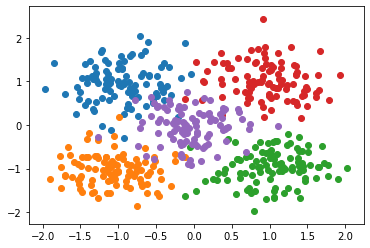

In [20]:
plt.scatter(X[Y==0, 0], X[Y==0,1])
plt.scatter(X[Y==1, 0], X[Y==1,1])
plt.scatter(X[Y==2, 0], X[Y==2,1])
plt.scatter(X[Y==3, 0], X[Y==3,1])
plt.scatter(X[Y==4, 0], X[Y==4,1])

In [21]:
y_cat = to_categorical(Y, 5) # one hot encoding

In [22]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 222us/step - loss: 1.3624 - accuracy: 0.3500
Epoch 2/100
500/500 [==============================] - 0s 50us/step - loss: 0.6637 - accuracy: 0.7920
Epoch 3/100
500/500 [==============================] - 0s 51us/step - loss: 0.4411 - accuracy: 0.9100
Epoch 4/100
500/500 [==============================] - 0s 50us/step - loss: 0.3473 - accuracy: 0.9420
Epoch 5/100
500/500 [==============================] - 0s 55us/step - loss: 0.3030 - accuracy: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 44us/step - loss: 0.2735 - accuracy: 0.9440
Epoch 7/100
500/500 [==============================] - 0s 56us/step - loss: 0.2542 - accuracy: 0.9440
Epoch 8/100
500/500 [==============================] - 0s 67us/step - loss: 0.2400 - accuracy: 0.9520
Epoch 9/100
500/500 [==============================] - 0s 53us/step - loss: 0.2291 - accuracy: 0.9480
Epoch 10/100
500/500 [==============================] - 0s 49us/step - loss: 0.22

500/500 [==============================] - 0s 72us/step - loss: 0.1516 - accuracy: 0.9480
Epoch 81/100
500/500 [==============================] - 0s 58us/step - loss: 0.1513 - accuracy: 0.9500
Epoch 82/100
500/500 [==============================] - 0s 57us/step - loss: 0.1517 - accuracy: 0.9500
Epoch 83/100
500/500 [==============================] - 0s 66us/step - loss: 0.1525 - accuracy: 0.9500
Epoch 84/100
500/500 [==============================] - 0s 46us/step - loss: 0.1521 - accuracy: 0.9500
Epoch 85/100
500/500 [==============================] - 0s 59us/step - loss: 0.1519 - accuracy: 0.9480
Epoch 86/100
500/500 [==============================] - 0s 45us/step - loss: 0.1517 - accuracy: 0.9460
Epoch 87/100
500/500 [==============================] - 0s 49us/step - loss: 0.1547 - accuracy: 0.9460
Epoch 88/100
500/500 [==============================] - 0s 51us/step - loss: 0.1520 - accuracy: 0.9480
Epoch 89/100
500/500 [==============================] - 0s 54us/step - loss: 0.1527 - 

In [24]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

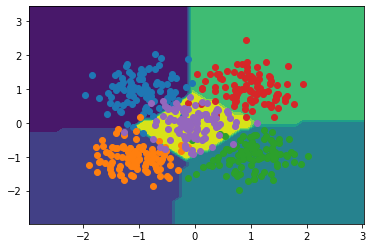

In [25]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0,1])
plt.scatter(X[Y==1, 0], X[Y==1,1])
plt.scatter(X[Y==2, 0], X[Y==2,1])
plt.scatter(X[Y==3, 0], X[Y==3,1])
plt.scatter(X[Y==4, 0], X[Y==4,1])

Prediction is:  [4]


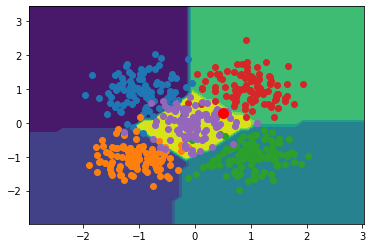

In [26]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[Y==0, 0], X[Y==0,1])
plt.scatter(X[Y==1, 0], X[Y==1,1])
plt.scatter(X[Y==2, 0], X[Y==2,1])
plt.scatter(X[Y==3, 0], X[Y==3,1])
plt.scatter(X[Y==4, 0], X[Y==4,1])
x = 0.5
y = 0.3

point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)